# Assignment 1

## *How should I price auto insurance in the United States?*

## Introduction

**Business Context.** The ability to price an insurance quote properly has a significant impact on insurers' management decisions and financial statements. You are the chief data scientist at a new startup insurance company focusing on providing affordable insurance to millennials. You are tasked to assess the current state of insurance companies to see what factors large insurance providers charge premiums for. Fortunately for you, your company has compiled a dataset by surveying what people currently pay for insurance from large companies. Your findings will be used as the basis of developing your company's millenial car insurance offering. 

**Business Problem.** Your task is to build a **minimal** model to predict the cost of insurance from the data set using various characteristics of a policyholder.

**Analytical Context.** The data resides in a CSV file which has been pre-cleaned for you and can directly be read in. Throughout the case, you will be iterating on your initial model many times based on common pitfalls that arise which we discussed in previous cases. You will be using the Python `statsmodels` package to create and analyze these linear models.

In [2]:
### Load relevant packages

import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.api         as sm
import statsmodels.formula.api as smf
import os

# This statement allow to display plot without asking to 
%matplotlib inline

# always make it pretty 
plt.style.use('ggplot')

## Diving into the data

In [3]:
df = pd.read_csv('Allstate-cost-cleaned.csv',
    dtype = { # indicate categorical variables
        'A': 'category',
        'B': 'category',
        'C': 'category',
        'D': 'category',
        'E': 'category',
        'F': 'category',
        'G': 'category',
        'car_value': 'category',
        'state': 'category'
    }
)

The following are the columns in the dataset:

1. **state**: State where shopping point occurred
2. **group_size**: How many people will be covered under the policy (1, 2, 3 or 4) 
3. **homeowner**: Whether the customer owns a home (0=no, 1=yes)
4. **car_age**: Age of the customer's car (How old the car is)
5. **car_value**: Value of the car when it was new
6. **risk_factor**: An ordinal assessment of how risky the customer is (0,1, 2, 3, 4) 
7. **age_oldest**: Age of the oldest person in customer's group
8. **age_youngest**: Age of the youngest person in customer's group
9. **married_couple**: Does the customer group contain a married couple (0=no, 1=yes) 
10. **C_previous**: What the customer formerly had or currently has for product option C (0=nothing, 1, 2, 3,4)
11. **duration_previous**: How long (in years) the customer was covered by their previous issuer
12. **A,B,C,D,E,F,G**: The coverage options:
13. **A**: Collision (levels: 0, 1, 2);
14. **B**: Towing (levels: 0, 1);
15. **C**: Bodily Injury (BI, levels: 1, 2, 3, 4);
16. **D**: Property Damage (PD, levels 1, 2, 3);
17. **E**: Rental Reimbursement (RR, levels: 0, 1);
18. **F**: Comprehensive (Comp, levels: 0, 1, 2, 3);
19. **G**: Medical/Personal Injury Protection (Med/PIP, levels: 1, 2, 3, 4)
20. **cost**: cost of the quoted coverage options 

In [4]:
df.head(10)

,Unnamed: 0,state,group_size,homeowner,car_age,car_value,risk_factor,age_oldest,age_youngest,married_couple,C_previous,duration_previous,A,B,C,D,E,F,G,cost
0,0,OK,1,0,9,f,0.0,24,24,0,3.0,9.0,0,0,1,1,0,0,4,543
1,1,OK,1,0,9,f,0.0,24,24,0,3.0,9.0,2,1,1,3,1,3,2,611
2,2,PA,1,1,7,f,0.0,74,74,0,2.0,15.0,2,0,2,3,1,2,2,691
3,3,PA,1,1,7,f,0.0,74,74,0,2.0,15.0,2,0,2,3,1,2,2,695
4,4,AR,1,0,4,d,4.0,26,26,0,3.0,1.0,1,0,1,1,0,2,2,628
5,5,AR,1,0,4,d,4.0,26,26,0,3.0,1.0,1,0,2,1,0,2,2,625
6,6,AR,1,0,4,d,4.0,26,26,0,3.0,1.0,1,0,2,1,0,2,2,628
7,7,OK,1,0,13,f,3.0,22,22,0,0.0,0.0,0,0,1,1,0,0,2,596
8,8,OK,1,0,13,f,3.0,22,22,0,0.0,0.0,2,0,1,1,0,3,2,711
9,9,OK,1,0,13,f,3.0,22,22,0,0.0,0.0,2,0,1,1,0,3,2,722


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15483 entries, 0 to 15482
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Unnamed: 0         15483 non-null  int64   
 1   state              15483 non-null  category
 2   group_size         15483 non-null  int64   
 3   homeowner          15483 non-null  int64   
 4   car_age            15483 non-null  int64   
 5   car_value          15435 non-null  category
 6   risk_factor        15483 non-null  float64 
 7   age_oldest         15483 non-null  int64   
 8   age_youngest       15483 non-null  int64   
 9   married_couple     15483 non-null  int64   
 10  C_previous         15483 non-null  float64 
 11  duration_previous  15483 non-null  float64 
 12  A                  15483 non-null  category
 13  B                  15483 non-null  category
 14  C                  15483 non-null  category
 15  D                  15483 non-null  category
 16  E   

In [6]:
# I decided to drop the rows with missing values in the 'car_value' column
# since it is a small proportion of the data (0.3%)
# and I believe it would not affect the model significantly
df = df.dropna(subset=['car_value']).reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15435 entries, 0 to 15434
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Unnamed: 0         15435 non-null  int64   
 1   state              15435 non-null  category
 2   group_size         15435 non-null  int64   
 3   homeowner          15435 non-null  int64   
 4   car_age            15435 non-null  int64   
 5   car_value          15435 non-null  category
 6   risk_factor        15435 non-null  float64 
 7   age_oldest         15435 non-null  int64   
 8   age_youngest       15435 non-null  int64   
 9   married_couple     15435 non-null  int64   
 10  C_previous         15435 non-null  float64 
 11  duration_previous  15435 non-null  float64 
 12  A                  15435 non-null  category
 13  B                  15435 non-null  category
 14  C                  15435 non-null  category
 15  D                  15435 non-null  category
 16  E   

### Exercise 1:

Write code to visualize the relationship between cost and the following variables. Choose your plots judiciously based on what you know about each variable. Different variable types (categorical vs. numerical) should have different types of plots (e.g. scatter, boxplot, violin plot, etc.) Group your plots together using the `plt.subplot()` function.

1. `car_age`
2. `age_oldest`
3. `age_youngest`
4. `duration_previous`
5. `C_previous`
6. `homeowner`
7. `group_size`
8. `car_age`
9. Categories A-G (7 different plots)

**Answer.**

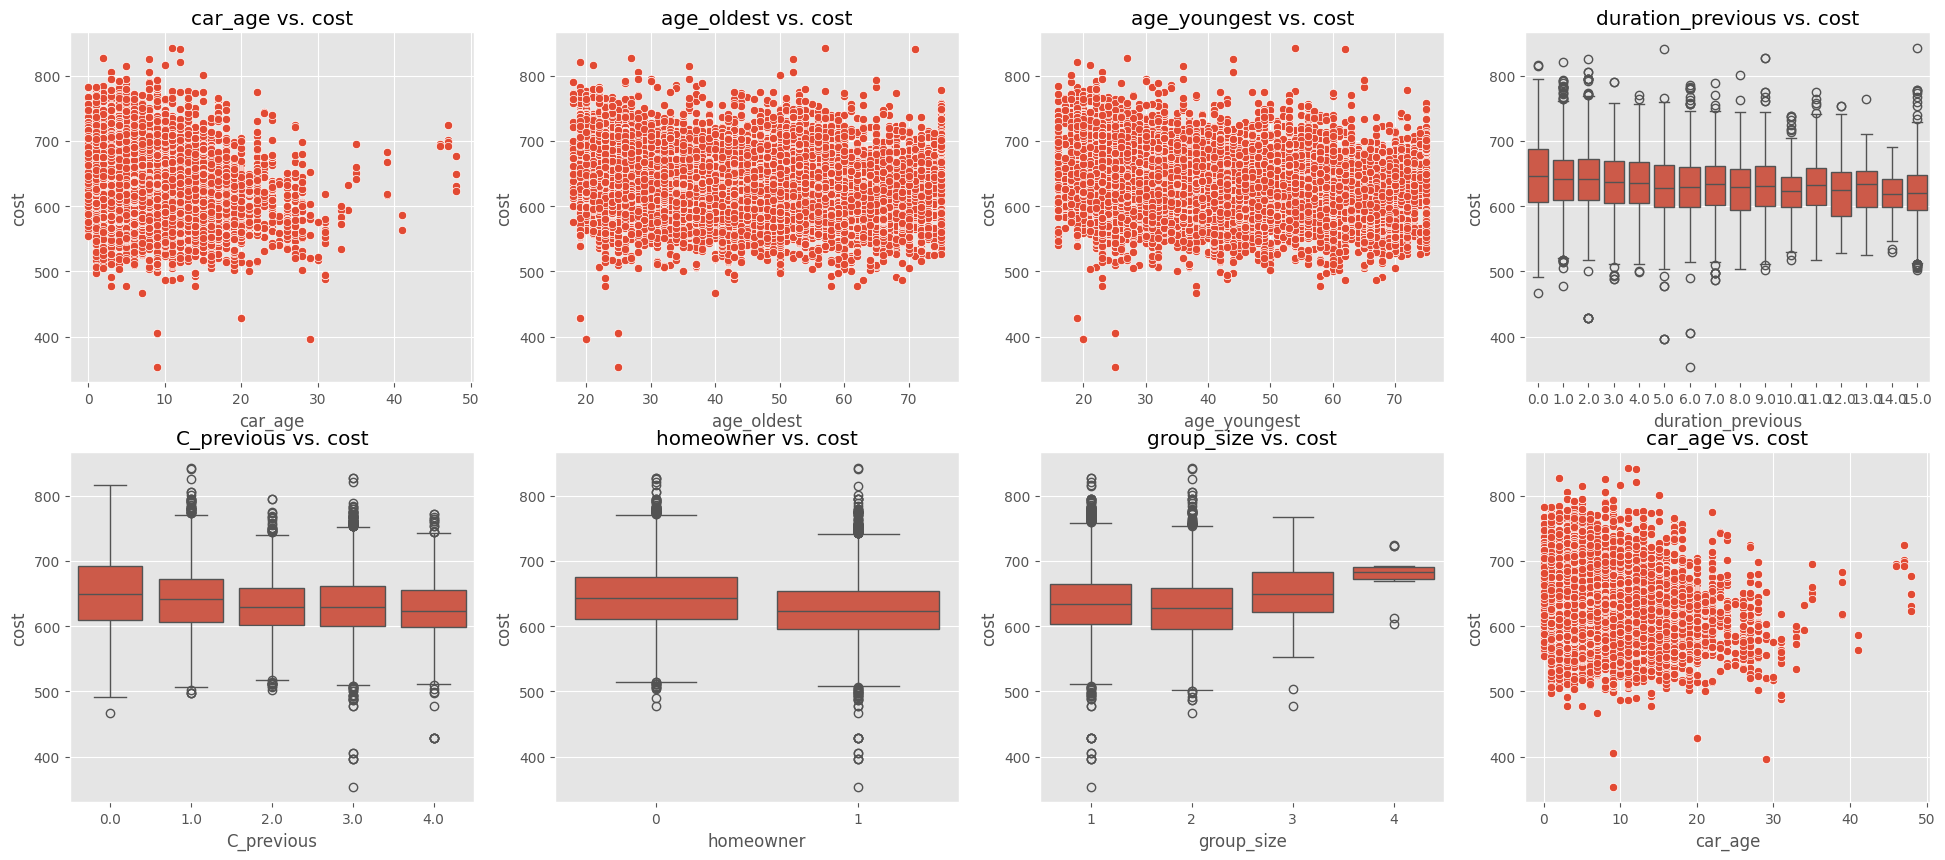

In [7]:
var_list = ['car_age', 'age_oldest', 'age_youngest', 'duration_previous', 'C_previous', 'homeowner', 'group_size', 'car_age']

plt.figure(figsize=(24,10))
for i, var in enumerate(var_list):
    plt.subplot(2,4,i+1)
    if var in ['group_size','homeowner', 'duration_previous', 'C_previous']:
      sns.boxplot(x=var, y='cost', data=df)
    else:
      sns.scatterplot(x=var, y='cost', data=df)
    plt.title(var + ' vs. cost')
plt.show()

In [8]:
#rename coverage columns for better readability
df.rename(columns={'A': 'collison_level',
                   'B': 'towing_level',
                   'C': 'bodily_injury_level',
                   'D': 'property_damage_level',
                   'E': 'rental_reimbursement_level',
                   'F': 'comprehensive_level',
                   'G': 'medical/personal_injury_projection_level'}, inplace=True)

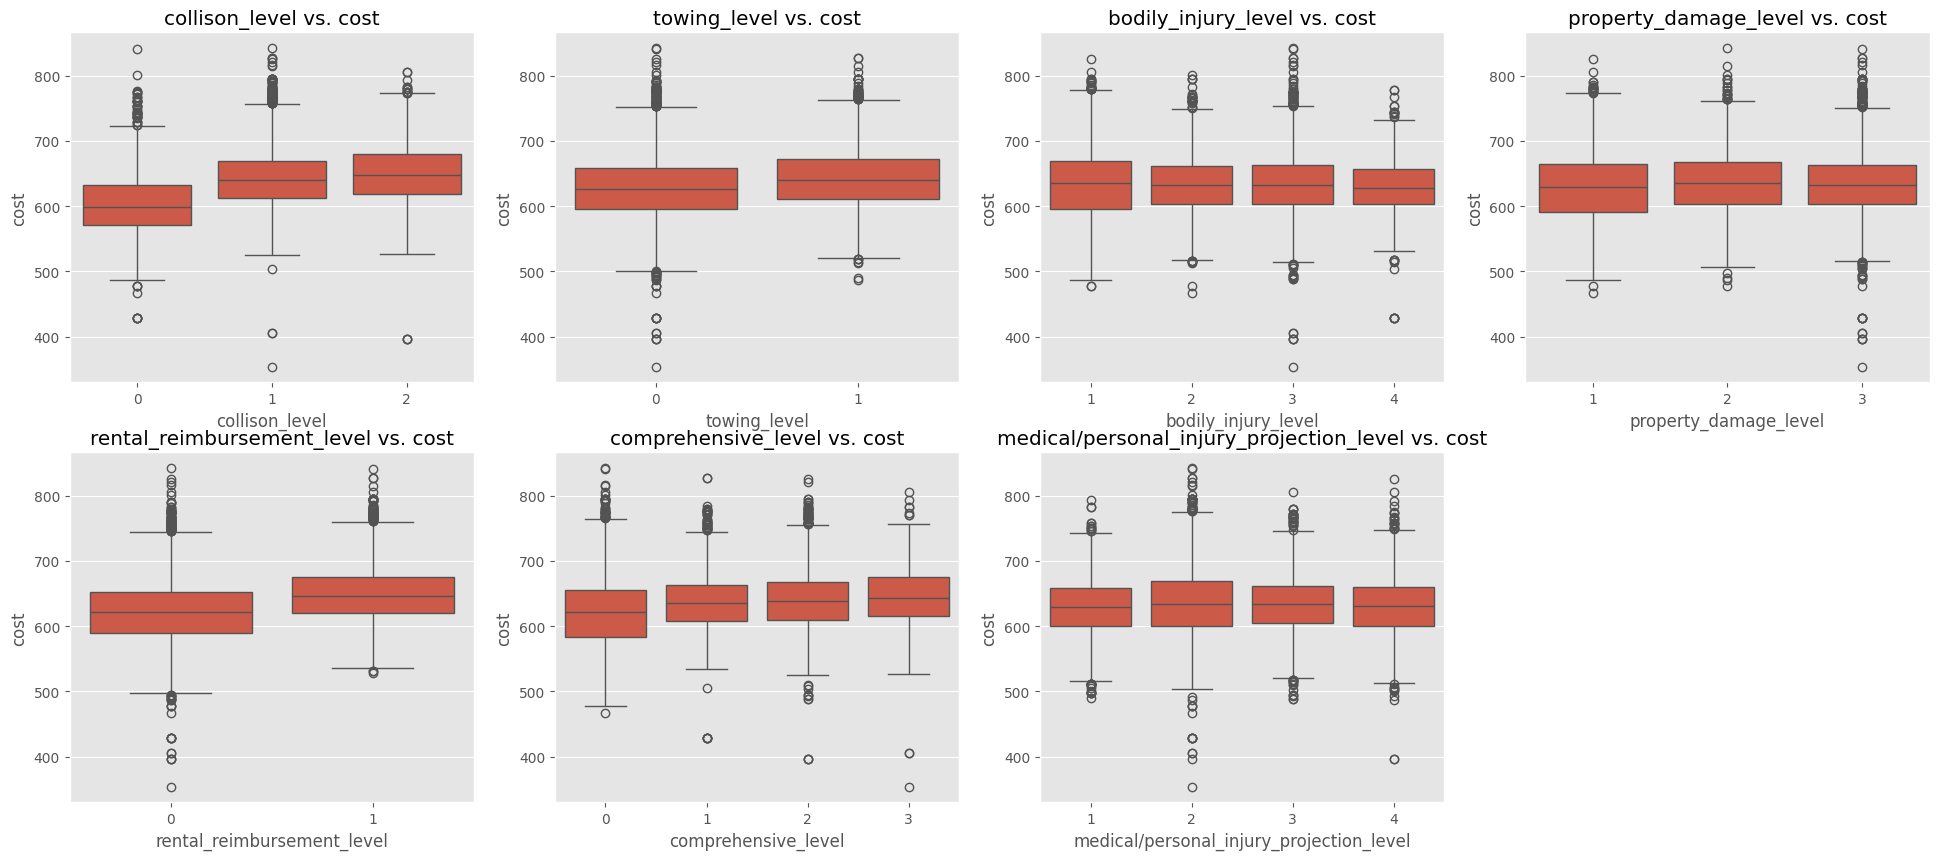

In [9]:
coverage_options = ['collison_level', 'towing_level', 'bodily_injury_level', 'property_damage_level',
                    'rental_reimbursement_level', 'comprehensive_level', 'medical/personal_injury_projection_level']

plt.figure(figsize=(24,10))
for i, var in enumerate(coverage_options):
    plt.subplot(2,4,i+1)
    sns.boxplot(x=var, y='cost', data=df)
    plt.title(var + ' vs. cost')
plt.show()

----------

### Exercise 2:

Convert all categorical data to be in the one-hot encoding format.

**Answer.**

In [10]:
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import OneHotEncoder

#Select columns with categorical variables

categorical_columns = df.select_dtypes(include=['category']).columns
df_categorical = df[categorical_columns]

# Initialize OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' avoids dummy variable trap

# Apply encoding
encoded_array = encoder.fit_transform(df[categorical_columns])

# Convert to DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate with original numerical data
df_final = pd.concat([df.drop(columns=categorical_columns), encoded_df], axis=1)

df_final.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15435 entries, 0 to 15434
Data columns (total 69 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Unnamed: 0                                  15435 non-null  int64  
 1   group_size                                  15435 non-null  int64  
 2   homeowner                                   15435 non-null  int64  
 3   car_age                                     15435 non-null  int64  
 4   risk_factor                                 15435 non-null  float64
 5   age_oldest                                  15435 non-null  int64  
 6   age_youngest                                15435 non-null  int64  
 7   married_couple                              15435 non-null  int64  
 8   C_previous                                  15435 non-null  float64
 9   duration_previous                           15435 non-null  float64
 10  cost      

----------

## Fitting a multiple linear regression

### Exercise 3:

Split your data into training and testing sets (an 80-20 split is a good starting point).

**Note:** Keep random seed as 1337 in the code cell

**Answer.**

In [11]:
#Import modules
from sklearn.model_selection import train_test_split

#Get the locations
X = df_final.drop(columns=['cost', 'Unnamed: 0'])
y = df_final['cost']

#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
	X, y, test_size=0.2, random_state=1337)

----------

### Exercise 4:

#### 4.1

Fit a multiple linear regression model to the training data regressing cost against all the other variables. Call this `model_all`. What is the AIC value?

**Answer.**

In [12]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12348 entries, 5020 to 3223
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   group_size                                  12348 non-null  int64  
 1   homeowner                                   12348 non-null  int64  
 2   car_age                                     12348 non-null  int64  
 3   risk_factor                                 12348 non-null  float64
 4   age_oldest                                  12348 non-null  int64  
 5   age_youngest                                12348 non-null  int64  
 6   married_couple                              12348 non-null  int64  
 7   C_previous                                  12348 non-null  float64
 8   duration_previous                           12348 non-null  float64
 9   state_AR                                    12348 non-null  float64
 10  state_CO     

In [13]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train)

# Fit the model
model_all = sm.OLS(y_train, X_train).fit()

# Now you can call summary()
print(model_all.summary())

                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     141.8
Date:                Tue, 25 Feb 2025   Prob (F-statistic):               0.00
Time:                        23:24:44   Log-Likelihood:                -61572.
No. Observations:               12348   AIC:                         1.233e+05
Df Residuals:                   12280   BIC:                         1.238e+05
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [14]:
print("AIC of model_all is: ", model_all.aic)

AIC of model_all is:  123280.5589684243


----------

#### 4.2 

According to `model_all`, which states are most and least expensive?

**Answer.**

most expensive: state DC

least expensive: state IA    

----------

#### 4.3

Interpret the coefficients of `group_size`, `homeowner`, `car_age`, `risk_factor`, `age_oldest`, `age_youngest`       `married_couple` , `duration_previous`. Do the signs and values of these coefficients make sense to you in the context of this business problem?

**Answer.**

**group size** - positive coefficient
* makes sense, the more people covered under the policy, the higher the price is.

**homeowner** - strong negative coefficient

*  makes sense because owning multiple houses mean you have a very good credit score. Owning more houses also indicates that these people are financially stable and less likely to file claims.
*  they might also bundle different types of insurance from the same insurers and therefore, they can get a nice discount.

**car age** - negative coefficient
*  makes sense because old cars have a lower market value so if they are damaged, the payout for repairs or replacement is less.
*  less likely to carry collision coverage which reduces the price.

**risk factor** - negative coefficient
* doesn't make sense because riskier drivers are more likley to get into accidents.

**age oldest** - positive coefficient
* makes sense to a certain level. Even though I would assume that older people are more careful; however, when you are older, you start having health problems that increase the likelihood of accidents.

**age youngest** - negative coefficient
* doesn't make sense because younger drivers tend to take more risks. This group is also too young to have any historical data be based on.

**married couple** - strong negative coefficient
* this makes sense because when you are married, you tend to be more careful with people whom you give a ride; therefore, there is a lower chance of payout.


**duration previous** - negative coefficient
* makes sense because being covered by insurance for a long time shows that they follow the laws and are responsible drivers.  



### Exercise 5:

Which variables from `model_all` are statistically significant? (For categorical variables, consider them to be significant if at least one of their categories are statistically significant). Refit the model using only these variables; call this `model_sig`. How does this model compare to the previous model?

**Answer.**

homeowner                                    

car_age                                       

risk_factor

age_oldest

age_youngest                                  

married_couple    

C_previous                                    

duration_previous                             

state

car_value

A

B

C

D

E

F

G

In [15]:
X_train_sig = X_train.drop(columns=['group_size'])
X_train_sig = sm.add_constant(X_train_sig)
model_sig = sm.OLS(y_train, X_train_sig).fit()

print(model_sig.summary())

                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     143.9
Date:                Tue, 25 Feb 2025   Prob (F-statistic):               0.00
Time:                        23:24:44   Log-Likelihood:                -61575.
No. Observations:               12348   AIC:                         1.233e+05
Df Residuals:                   12281   BIC:                         1.238e+05
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

----------

### Exercise 6:

In addition to the variables in `model_sig`, add terms for:

1. square of `age_youngest`
2. square term for the age of the car
3. interaction term for `car_value` and `age_youngest`

and save it to a new model `model_sig_plus`.

**Answer.**

----------

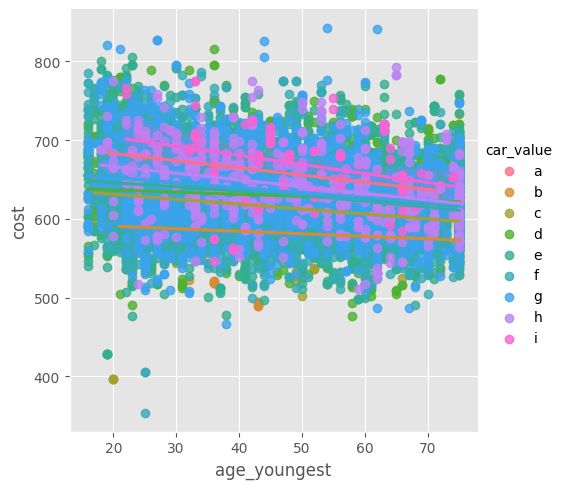

In [16]:
lm=sns.lmplot(x='age_youngest', y='cost', data=df, hue='car_value')

In [17]:
# Create new columns containing new terms

# Squared age_youngest and car_age
X_train_plus = X_train_sig.copy()
X_train_plus['squared_age_youngest'] = X_train_plus['age_youngest']**2
X_train_plus['squared_car_age'] = X_train_plus['car_age']**2

# Interaction between car_age and age_youngest
car_value_columns = [col for col in X_train_plus.columns if 'car_value' in col]
for col in car_value_columns:
    X_train_plus[col + "-age youngest"] = X_train_plus[col] * X_train_plus['age_youngest']



In [18]:
X_train_plus = sm.add_constant(X_train_plus)
model_sig_plus = sm.OLS(y_train, X_train_plus).fit()

print(model_sig_plus.summary())

                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     132.0
Date:                Tue, 25 Feb 2025   Prob (F-statistic):               0.00
Time:                        23:24:48   Log-Likelihood:                -61422.
No. Observations:               12348   AIC:                         1.230e+05
Df Residuals:                   12271   BIC:                         1.236e+05
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

## Feature selection

To reduce the number of features, it can often be helpful to aggregate the categories; for example, we can create a new variable by assigning each state to a larger region:

In [19]:
state_regions = pd.read_csv('https://raw.githubusercontent.com/cphalpert/census-regions/master/us%20census%20bureau%20regions%20and%20divisions.csv')
# should download the above file
state_regions

,State,State Code,Region,Division
0,Alaska,AK,West,Pacific
1,Alabama,AL,South,East South Central
2,Arkansas,AR,South,West South Central
3,Arizona,AZ,West,Mountain
4,California,CA,West,Pacific
5,Colorado,CO,West,Mountain
6,Connecticut,CT,Northeast,New England
7,District of Columbia,DC,South,South Atlantic
8,Delaware,DE,South,South Atlantic
9,Florida,FL,South,South Atlantic


### Exercise 7:

#### 7.1

Create a new column where a state is replaced with the region it is in according to the above table.

**Answer.**

In [20]:
state_regions = state_regions.drop(columns= ["State", "Division"])


In [21]:

# merge the state_regions dataframe with the df dataframe
df_with_region = pd.merge(df, state_regions, left_on='state', right_on='State Code', how='left').drop(columns=['State Code'])


In [22]:
#change region to category
df_with_region['Region'] = df_with_region['Region'].astype('category')


In [23]:
#Transform this new dataset to one-hot encoding
cat_columns = df_with_region.select_dtypes(include=['category']).columns
df_cat = df_with_region[cat_columns]

# Initialize OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' avoids dummy variable trap

# Apply encoding
encoded_array = encoder.fit_transform(df_with_region[cat_columns])

# Convert to DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(cat_columns))

# Concatenate with original numerical data
df_with_region_final= pd.concat([df_with_region.drop(columns=categorical_columns), encoded_df], axis=1)


In [24]:
#drop the original region column as it is now encoded
df_with_region_final.drop(columns=['Region'], inplace=True)

df_with_region_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15435 entries, 0 to 15434
Data columns (total 37 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Unnamed: 0                                  15435 non-null  int64  
 1   group_size                                  15435 non-null  int64  
 2   homeowner                                   15435 non-null  int64  
 3   car_age                                     15435 non-null  int64  
 4   risk_factor                                 15435 non-null  float64
 5   age_oldest                                  15435 non-null  int64  
 6   age_youngest                                15435 non-null  int64  
 7   married_couple                              15435 non-null  int64  
 8   C_previous                                  15435 non-null  float64
 9   duration_previous                           15435 non-null  float64
 10  cost      

In [25]:
# split test and train data

#Get the locations
region_vars = df_with_region_final.drop(columns=['cost','Unnamed: 0','group_size'])

#Split the dataset
region_train, region_test = train_test_split(region_vars, test_size=0.2, random_state=1337)

In [26]:

# Squared age_youngest and car_age
region_train['squared_age_youngest'] = region_train['age_youngest']**2
region_train['squared_car_age'] = region_train['car_age']**2

# Interaction between car_age and age_youngest
car_value_cols = [col for col in region_train.columns if 'car_value' in col]
for col in car_value_cols:
    region_train[col + "-age youngest"] = region_train[col] * region_train['age_youngest']

----------

#### 7.2

Fit the model as in `model_sig_plus` but this time use `region` instead of `state`. Call this `model_region`.

**Answer.**

In [27]:

# Add constant term
region_train = sm.add_constant(region_train)

# Fit the model
model_region = sm.OLS(y_train, region_train).fit()

# Now you can call summary()
print(model_region.summary())

                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     168.6
Date:                Tue, 25 Feb 2025   Prob (F-statistic):               0.00
Time:                        23:24:48   Log-Likelihood:                -62198.
No. Observations:               12348   AIC:                         1.245e+05
Df Residuals:                   12303   BIC:                         1.248e+05
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

----------

### Exercise 8:

#### 8.1

What should we do next to minimize features?

**Answer.**

We can investigate multicollinearity because we have a lot of variables in the model. We should also remove variables that are statiscally insignificant. We also need to take a look into the residual distributions, whether or not it follows a normal distribution and how we can improve it.

----------

#### 8.2

Using a method of your choice, find the numerical feature(s) in `model_region`, except for the three we added in Exercise 6, which exhibit multicollinearity. **Hint:** consider looking at correlations.

**Answer.**

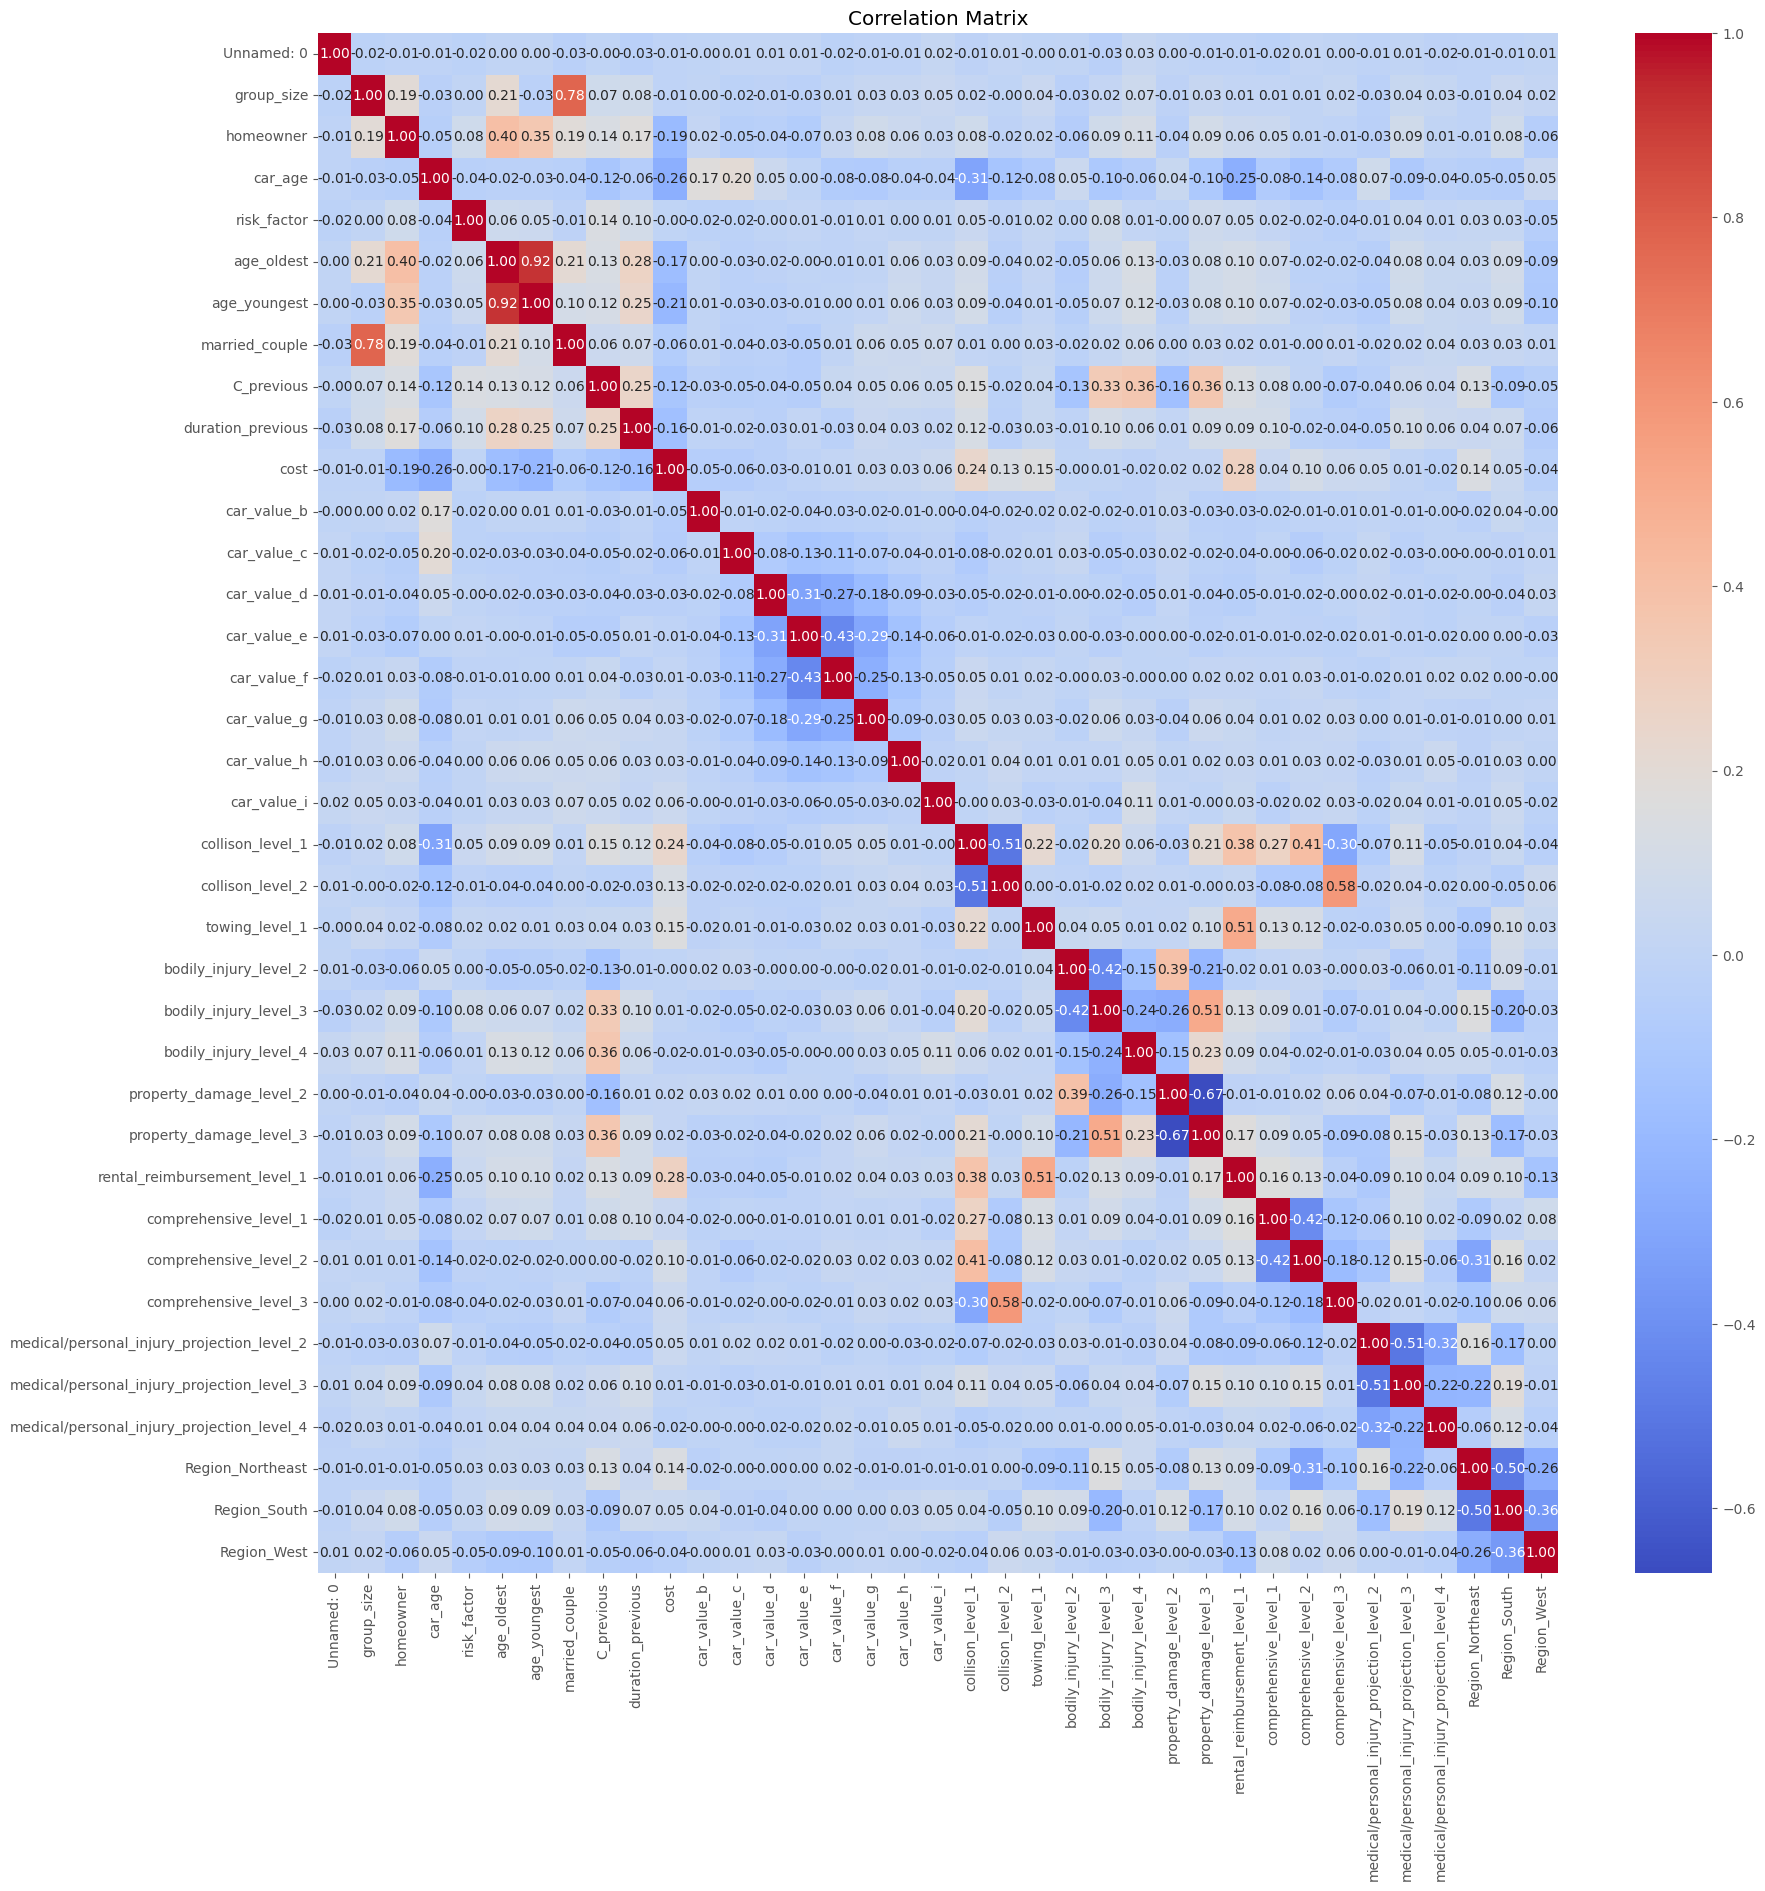

In [28]:
# Compute the correlation matrix for numerical features
corr_matrix = df_with_region_final.corr()

# Plot the heatmap
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [29]:
# Compute the correlation matrix
corr_matrix = df_with_region_final.corr().abs()  # Use absolute values for easier thresholding

# Find pairs of variables with correlation > |0.8| 
high_corr = (corr_matrix > 0.8) & (corr_matrix < 1.0) #exclude self-correlation

# Extract the pairs
high_corr_pairs = [(corr_matrix.index[i], corr_matrix.columns[j], corr_matrix.iat[i, j])
                   for i in range(len(corr_matrix))
                   for j in range(i+1, len(corr_matrix))  # Only upper triangle
                   if corr_matrix.iat[i, j] > 0.8]

# Print the pairs
for var1, var2, corr in high_corr_pairs:
    print(f"{var1} and {var2} has a correlation of {corr:.2f}")

age_oldest and age_youngest has a correlation of 0.92


----------

#### 8.3:

Refit `model_region` after dropping these redundant predictor(s); call this `model_region_no_oldest`.

**Answer.**

I also wanted to drop some variables with high p-value

In [30]:
# Add constant term
columns_to_drop = ['age_oldest', 'bodily_injury_level_2', 'bodily_injury_level_3', 'bodily_injury_level_4', 'property_damage_level_2', 'property_damage_level_3']
region_train = region_train.drop(columns=columns_to_drop)
region_train = sm.add_constant(region_train)

# Fit the model
model_region_no_oldest = sm.OLS(y_train, region_train).fit()

# Now you can call summary()
print(model_region_no_oldest.summary())


                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     190.2
Date:                Tue, 25 Feb 2025   Prob (F-statistic):               0.00
Time:                        23:24:51   Log-Likelihood:                -62259.
No. Observations:               12348   AIC:                         1.246e+05
Df Residuals:                   12309   BIC:                         1.249e+05
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

----------

#### 8.4

What would you do to diagnose the `model_region_no_oldest` fit? What does this diagnosis suggest to you? (Hint: try plotting the residuals in various ways.)

**Answer.**

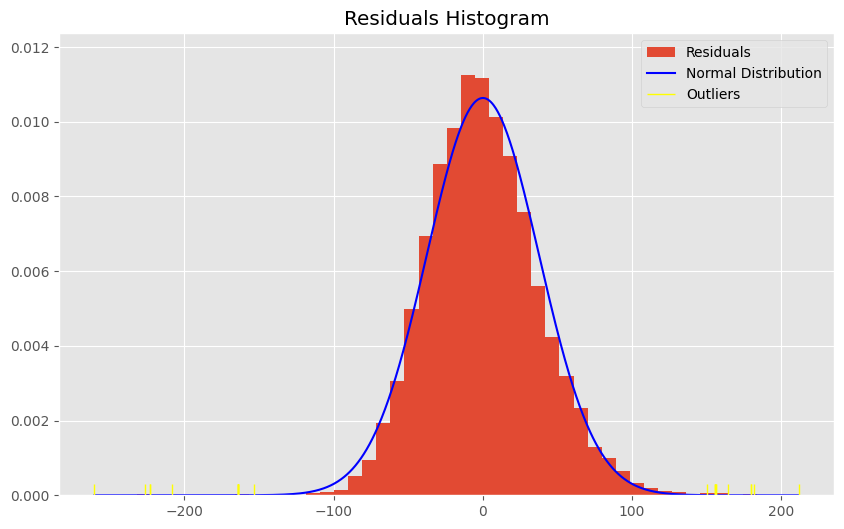

In [31]:
# Plot a residual histogram

import scipy


plt.figure(figsize=(10,6))
plt.hist(model_region_no_oldest.resid, density=True, bins=50, label='Residuals')
plt.title('Residuals Histogram')

# Add a normal distribution for comparison

xx = np.linspace(model_region_no_oldest.resid.min(), model_region_no_oldest.resid.max(), num=1000)
plt.plot(xx, scipy.stats.norm.pdf(xx, loc = 0, scale = np.sqrt(model_region_no_oldest.scale)), 
         label='Normal Distribution', color='blue')

outliers = np.abs(model_region_no_oldest.resid) > 4*np.sqrt(model_region_no_oldest.scale)
sns.rugplot(model_region_no_oldest.resid[outliers], color='yellow', label='Outliers')
plt.legend(loc='upper right')


1. The peak of the residual is slightly higher than the normal distribution.
2. Overall, the residuals closely replicate a normal distribution with only a few outliers on both sides.

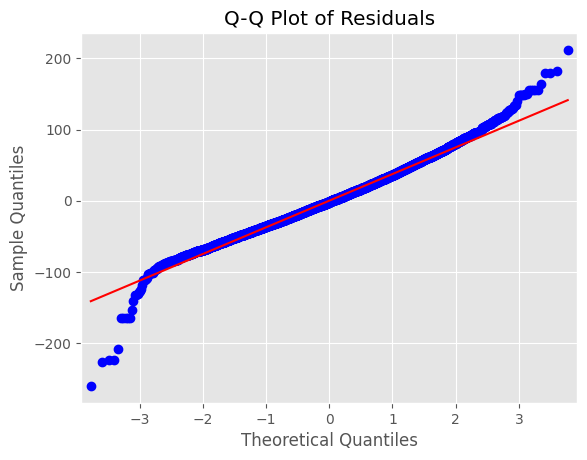

In [32]:
# Plot a residual QQ plot
sm.qqplot(model_region_no_oldest.resid, line='s', markeredgecolor='b', markerfacecolor='b')
plt.title('Q-Q Plot of Residuals')
plt.show()

Overall the points form a straight line, but the plot also sugests some extreme outliers suggested by excess tail behaviour.

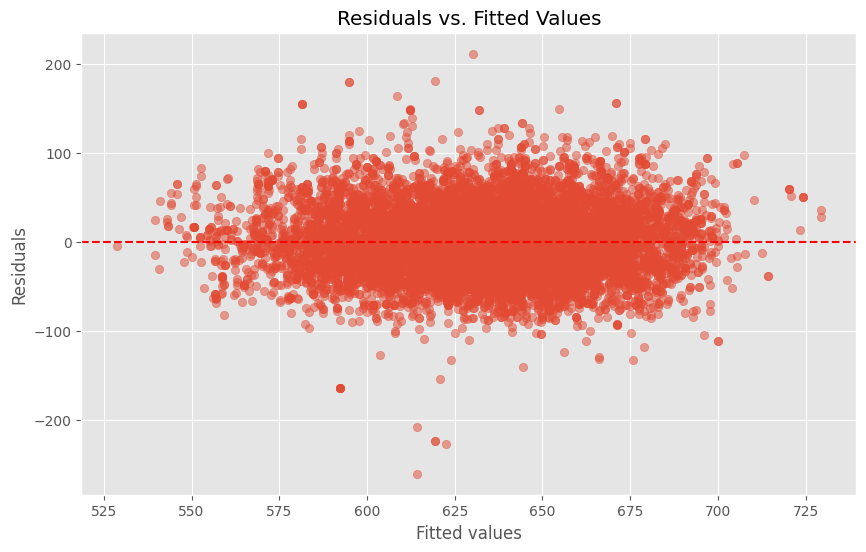

In [33]:
# Calculate the residuals
residuals = model_region_no_oldest.resid
fitted_values = model_region_no_oldest.fittedvalues

# Plotting residuals vs. fitted values
plt.figure(figsize=(10,6))
plt.scatter(fitted_values, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

The residuals mostly fit nicely between -200 and 200.

----------

### Exercise 9:

#### 9.1

Find the best Box-Cox transformation of `cost` used to fit `model_region_no_oldest`. What value do you get?

**Answer.**

In [34]:
from scipy import stats

cost, fitted_lambda = stats.boxcox(df_final['cost'])
round(fitted_lambda, 2)

print(f"Lambda value for the whole data set: {fitted_lambda}")

cost, fitted_lambda = stats.boxcox(y_train)
round(fitted_lambda, 2)  # if this is negative, then use log
                         # if this is ~0.5, then use squared root
                         # if this ~0.33333 then use cubic root

print(f"Lambda value for the training set: {fitted_lambda}")


Lambda value for the whole data set: 0.537506312097373
Lambda value for the training set: 0.6573297023151047


They are both around 0.5, so it would make sense to use squared root transformation.

----------

#### 9.2

Refit `model_region_no_oldest`, but now with the transformation as suggested by the Box-Cox. Call it `model_region_no_oldest_box_cox`.

**Answer.**

In [35]:
#square root y_train 

y_train_sqrt = np.sqrt(y_train)

region_train = sm.add_constant(region_train)

# Fit the model
model_region_no_oldest_box_cox = sm.OLS(y_train_sqrt, region_train).fit()

# Now you can call summary()
print(model_region_no_oldest_box_cox.summary())


                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     191.4
Date:                Tue, 25 Feb 2025   Prob (F-statistic):               0.00
Time:                        23:24:52   Log-Likelihood:                -13864.
No. Observations:               12348   AIC:                         2.781e+04
Df Residuals:                   12309   BIC:                         2.809e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

----------

## Conclusion

In this, you practiced creating linear models using `statsmodels` and iteratively trimming the input variables to go from including all the variables in the dataset to using only the most relevant variables. You excluded those variables that were statistically insignificant and removed those that had high correlation. Finally, we performed some feature engineering in an attempt to remove some tail behavior that deviates from the normal distribution to better fit our linear model. In the end, we had a very minimal model that contained variables that other insurance companies use to charge premiums that gave us insight on how we can better serve a niche population. 